<div class="alert alert-info">
<b>Problem statement:</b>

Based on the given data, we need to train, and evaluate machine learning models capable of indentifying (```binary classification```) passengers who would be transported to an alternate dimension on collission with a space time anamoly
</div>

In [1]:
# Import requied packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# import catboost as cb
# from catboost import Pool
# import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Training set
print("Training set")
df_train = pd.read_csv('./DATA/train.csv')
display(df_train.head(5))
print("Train set shape",df_train.shape)
print('\n')

print("Test set")
df_test = pd.read_csv('./DATA/test.csv')
display(df_test.head(5))
print("Test set shape",df_test.shape)
print('\n')

Training set


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Train set shape (8693, 14)


Test set


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Test set shape (4277, 13)




<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Exploratory Data Analysis</h1>
</div>

In [3]:
print("Data types for all columns")
display(df_train.dtypes)
print('\n')
print(df_train.dtypes.value_counts())

Data types for all columns


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object



object     7
float64    6
bool       1
dtype: int64


<div class="alert alert-success">
<b>Inference:</b>

1. We have 7 features with data type ```object```
2. We have 6 features with data type ```float```
3. We have 1 target variable with data type ```boolean```
</div>

<div class="alert alert-success">
<b>Feature descriptions:</b>

1. ```PassengerId``` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. ```HomePlanet``` - The planet the passenger departed from, typically their planet of permanent residence.
3. ```CryoSleep``` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. ```Cabin``` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. ```Destination``` - The planet the passenger will be debarking to.
5. ```Age``` - The age of the passenger.
6. ```VIP``` - Whether the passenger has paid for special VIP service during the voyage.
7.```RoomService``` - Amount the passenger has billed at one of the Spaceship Titanic's luxury amenities.
8. ```FoodCourt``` - Amount the passenger has billed at one of the Spaceship Titanic's luxury amenities.
9. ```ShoppingMall``` - Amount the passenger has billed at one of the Spaceship Titanic's luxury amenities.
10.```Spa``` - Amount the passenger has billed at one of the Spaceship Titanic's luxury amenities.
11. ```VRDeck``` - Amount the passenger has billed at one of the Spaceship Titanic's luxury amenities.
12. ```Name``` - The first and last names of the passenger.
13. ```Transported``` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

</div>



In [4]:
print('Numeric columns','\n')
display(df_train.describe().columns)
display(df_train.info())
print('\n')
display(df_train.describe())
print('\n')
display(df_train.isna().sum())

Numeric columns 



Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<div class="alert alert-success">
<b>Inference:</b>

1. All numerical variables belong tot the ```money spent on the luxuries offered``` at the titanic spaceship, along with age of the passengers on board
2. The ```spread of the numerical data``` is wide ranged suggesting suggesting further investigations as mean loses significance with a large difference in values, leading to inconclusive trend understanding
3. All columns have missing values, except identifier,  ```PassengerId```, and target label ```Transported```
</div>

In [5]:
num_df = df_train.select_dtypes('number')
print('Slice of dataframe with numeric columns')
display(num_df.head(5))
print('\n')
cat_df = df_train.select_dtypes(include=['object','boolean'])
print('Slice of dataframe with categorical columns')
display(cat_df.head(5))
print('\n')

Slice of dataframe with numeric columns


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0




Slice of dataframe with categorical columns


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True


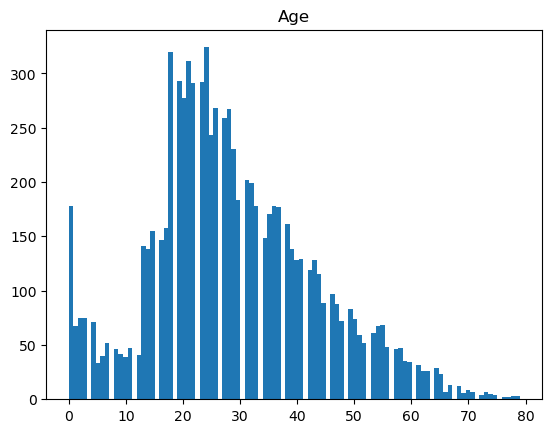

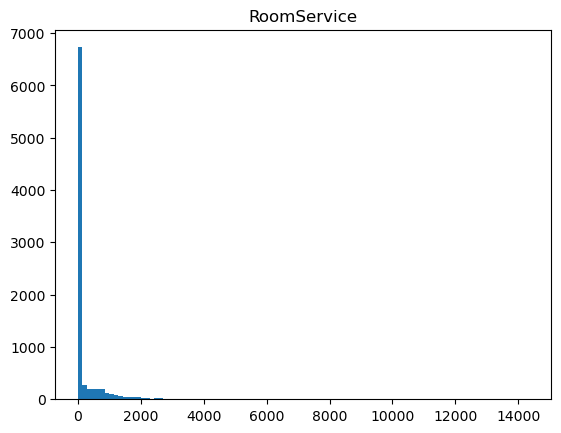

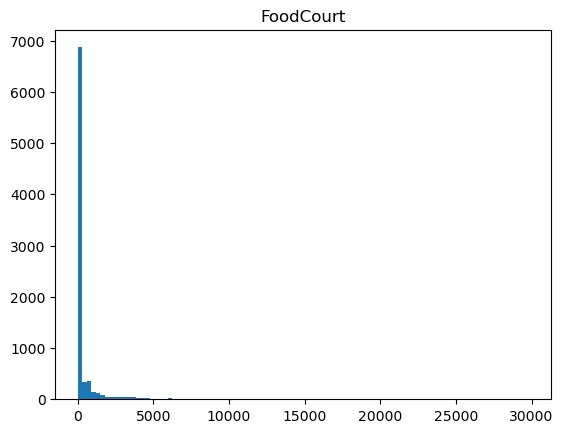

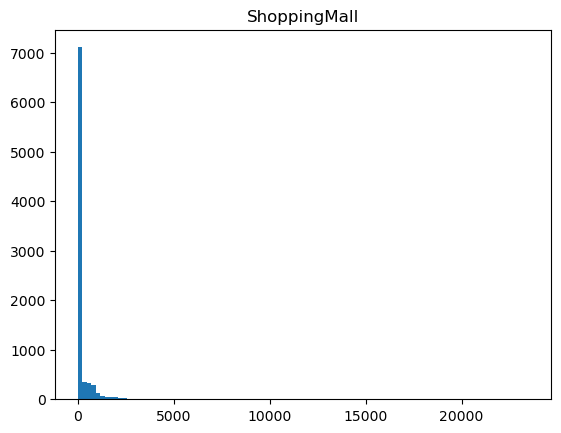

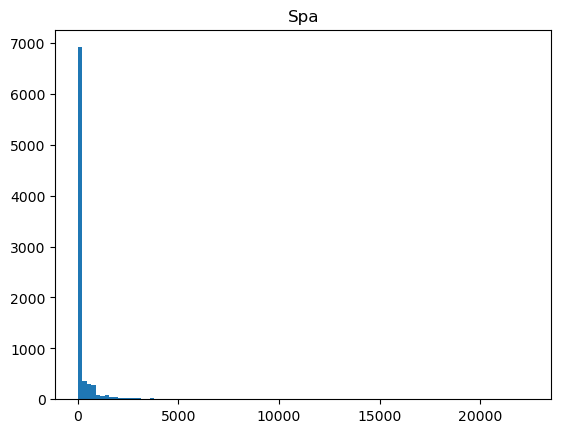

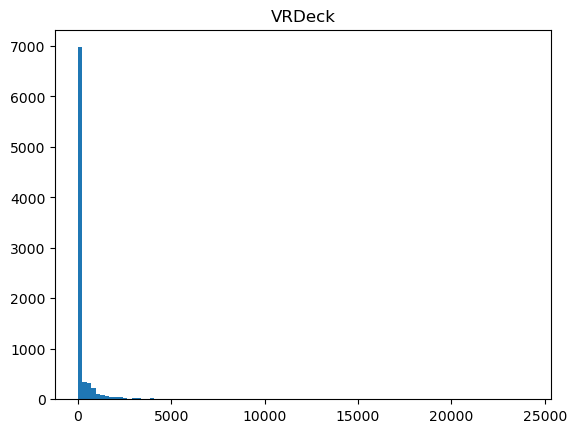

Text(0.5, 1.0, 'Correlation Heatmap')

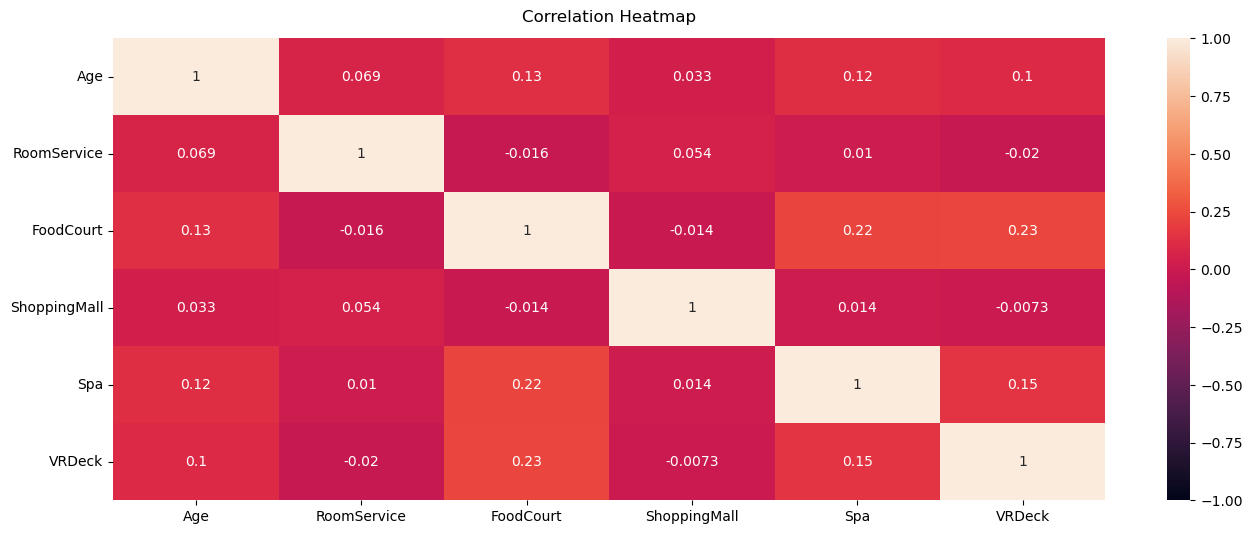

In [6]:
# Numeric columns distributions
for i in num_df:
    plt.hist(num_df[i],bins = 100,range=[num_df[i].min(), num_df[i].max()])
    plt.title(i)
    plt.show()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(num_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<div class="alert alert-success">
<b>Chart Inference:</b>

1. ```Age``` follows normal distribution. We see majority adults between 20 to 30, suggesting this group which is younger and has a higher procilivity to taking risks, are comfortable travelling in space. We also see a spike in ages of children
2. Older people are more prone to ordering ```room service```
3. Passengers who spend money on ```VRDeck``` at less likely to spend money on ```room service``` or ```shopping mall```
4. Passengers who spend money on ```food court``` are less likely to order ```room service```
</div>

In [7]:
# Comparing transported rate with numerical variables
values = list(num_df.columns)
pivot_table = pd.pivot_table(df_train, index='Transported', values=values, aggfunc='mean')
display(pivot_table)

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,382.615930,389.266066,167.566217,564.382666,543.629822
True,27.748834,532.691984,63.098021,179.829972,61.675531,69.148131


<div class="alert alert-success">
<b>While no causal effect is implied, the general trend says on average...</b>

Passengers who got transported on average spent less on spa, VRDeck and room service, which could indicate that passengers who were busy with  ```indoor activities``` were more likely to be subjected to interdimensional transport v/s others. 

 

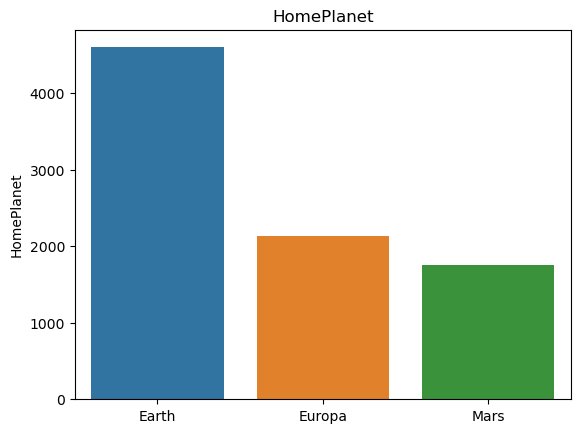

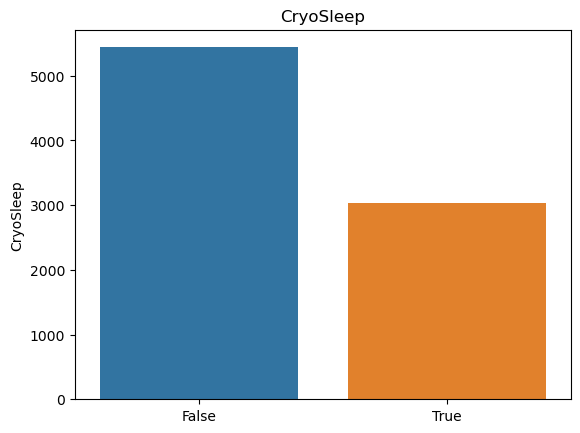

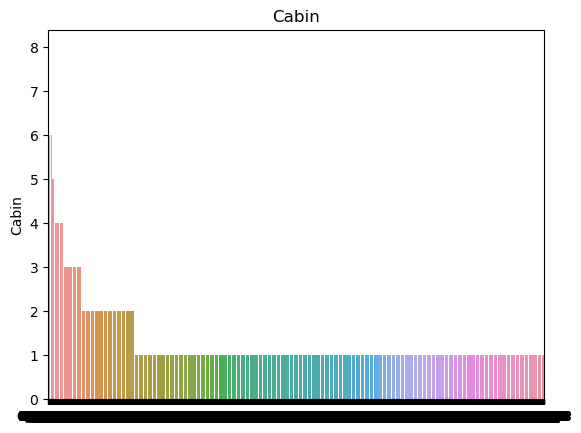

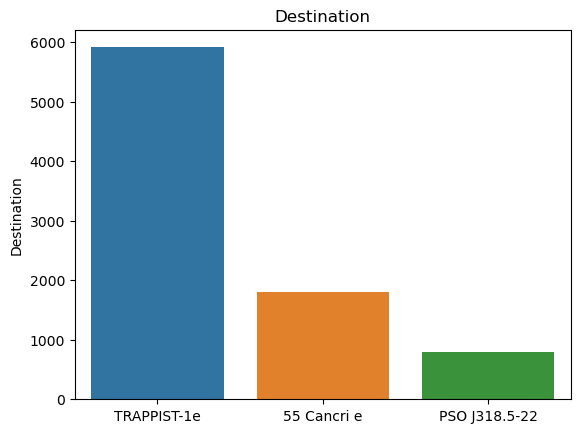

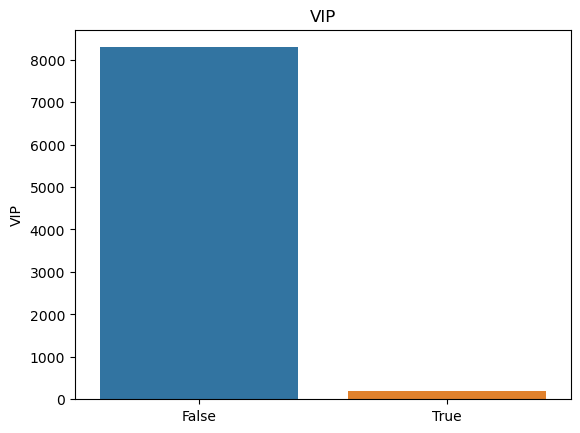

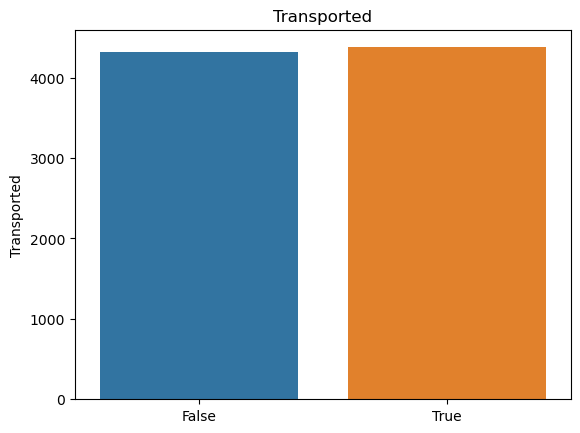

In [8]:
for column in cat_df.columns:
    if column != 'PassengerId' and column != 'Name':
        sns.barplot(x=cat_df[column].value_counts().index,y=cat_df[column].value_counts()).set_title(column)
        plt.show()

<div class="alert alert-success">
<b>Inference:</b>

1. Most passengers travelled from ```earth```
2. Majority were going to ```TRAPPIST-1e```
3. Comparatively few were ```VIP```
4. Slightly more number of passengers preferred to not be put in ```CryoSleep```
</div>

In [9]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [10]:
print(type(df_train['PassengerId']))

<class 'pandas.core.series.Series'>


In [11]:
# Similar to previous columns, we would like to look at the categorical column relation with 'Transported'
for column in cat_df.columns:
    if column != 'Transported' and column != 'Name' and column != 'Cabin' and column!= 'PassengerId':
        pivot_table = pd.pivot_table(df_train, index=column, values = 'Cabin',columns='Transported', aggfunc='count',margins=True)
        display(pivot_table)
        print('\n')

Transported,False,True,All
HomePlanet,,,
Earth,2594,1913,4507
Europa,706,1364,2070
Mars,820,902,1722
All,4120,4179,8299


Transported,False,True,All
CryoSleep,,,
False,3571,1760,5331
True,537,2416,2953
All,4108,4176,8284


Transported,False,True,All
Destination,,,
55 Cancri e,684,1066,1750
PSO J318.5-22,382,396,778
TRAPPIST-1e,3063,2725,5788
All,4129,4187,8316


Transported,False,True,All
VIP,,,
False,4003,4101,8104
True,118,75,193
All,4121,4176,8297


<div class="alert alert-success">
<b>Inference:</b>

1. Of the passengers travelling from ```Europa```, almost double the passengers were transported, posing a likely curiosity in the mechanics of Europa's geological system, making them prone to interdimensional transport
2. Of the few ```VIPs``` onboard, less than 3/4ths of them were prone to interdimensional travel. The number though no significant is reasonable considering there could be extra security measures in place
3. And those who opted for ```CryoSleep``` were 4 times more likely to be Transported v/s those who weren't
</div>

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Feature Engineering test</h1>
    <h2><i>Column - Cabin</i></h2>
</div>

In [12]:
print('Number of empty cells in the column cabin')
print(df_train.Cabin.isna().sum())
print('\n')
print('Unique values in the column cabin')
display(df_train.Cabin.value_counts())
print('\n')
print('Number of unique values in the column cabin')
display(df_train.Cabin.nunique())

Number of empty cells in the column cabin
199


Unique values in the column cabin


G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64



Number of unique values in the column cabin


6560

<div class="alert alert-success">
<b>Steps:</b>

1. The histogram for ```cabin```, appears to be cluttered, further investigations suggests the breakup of cabin by number of cabins booked (```cabin_number```), ```cabin deck``` and ```cabin side```
2.The assumption lies that number booked, deck and side suggest patterns in the feature cabin, hence worth investigating ```trend``` with respect to Transported
</div>

In [13]:
# Looking to assess cabin, feature engineer as high number of categories compared to training sample, i.e, simplify
df_train['Cabin_number'] = df_train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
display(df_train['Cabin_number'].value_counts())
display(pd.pivot_table(df_train, index = 'Transported',values = 'Cabin' ,columns = 'Cabin_number' ,aggfunc ='count'))

1    8494
0     199
Name: Cabin_number, dtype: int64

Cabin_number,0,1
Transported,,
False,0,4216
True,0,4278


In [14]:
df_train['Cabin_deck'] = df_train.Cabin.apply(lambda x: str(x).split('/')[0])
display(df_train['Cabin_deck'].value_counts())
display(pd.pivot_table(df_train, index = 'Transported',values = 'Cabin' ,columns = 'Cabin_deck' ,aggfunc ='count'))

F      2794
G      2559
E       876
B       779
C       747
D       478
A       256
nan     199
T         5
Name: Cabin_deck, dtype: int64

Cabin_deck,A,B,C,D,E,F,G,T,nan
Transported,,,,,,,,,
False,129,207,239,271,563,1565,1238,4,0
True,127,572,508,207,313,1229,1321,1,0


<div class="alert alert-success">
<b>Inference:</b>

1. Of the passengers travelling in cabin deck ```B``` and ```C```, more than around two times number of passengers got transported v/s those who were not transported
2. Of the passengers travelling in cabin deck ```E```, more than around two times number of passengers did not get transported v/s those who were 
</div>

In [15]:
# Add 'Cabin_side' column to df_train
df_train['Cabin_side'] = df_train.Cabin.apply(lambda x: str(x).split('/')[2] if len(str(x).split('/')) > 2 else np.nan)

# Display value counts for 'Cabin_side'
display(df_train['Cabin_side'].value_counts())

# Create pivot table with 'Transported' as index, 'Cabin' as values, 'Cabin_side' as columns
pivot_table = pd.pivot_table(df_train, index = 'Transported', columns = 'Cabin_side' ,values = 'Cabin', aggfunc ='count')

# Display pivot table
display(pivot_table)

S    4288
P    4206
Name: Cabin_side, dtype: int64

Cabin_side,P,S
Transported,,
False,2308,1908
True,1898,2380


<div class="alert alert-success">
<b>Inference:</bm

```Cabin side``` suggested no direction in the likelihood of being transported
</div>

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Feature Engineering test</h1>
    <h2><i>Column - PassengerId</i></h2>
</div>

In [16]:
display(df_train['PassengerId'].str.split('_').str[0].value_counts())

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: PassengerId, Length: 6217, dtype: int64

In [17]:
group_counts = df_train['PassengerId'].str.split('_').str[0].value_counts()
group_counts = group_counts.groupby(group_counts).size()

display(group_counts)

PassengerId
1    4805
2     841
3     340
4     103
5      53
6      29
7      33
8      13
Name: PassengerId, dtype: int64

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: PassengerId, dtype: int64

<AxesSubplot:>

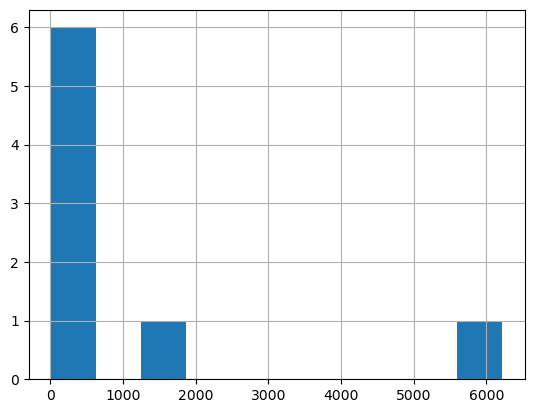

In [18]:
display(df_train['PassengerId'].str.split('_').str[1].value_counts())
df_train['PassengerId'].str.split('_').str[1].value_counts().hist()

<div class="alert alert-success">
    <b>Inference:</b>

```PassengerId``` in the form of gggg_pp where gggg indicates group id and pp indicates number within the group. Though some pattern is visible, data suggests it can be considered as secondary priority
</div>

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Feature Selection test</h1>
</div>

In [19]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_number,Cabin_deck,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,A,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1,G,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1,G,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,E,S


<div class="alert alert-success">
    <b>Inference:</b>

```PassengerId``` and ```Name``` can be deleted as they remain identifier columns
</div>

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Removing outliers</h1>
    <h2><i>Note: Ensure outliers removed only on train set</i></h2>
    <h3>This is an optional step as sometimes removing outliers could be detrimental to the model. Also we're limiting ourselves to Tukey method</h3>
</div>

In [20]:
def remove_outliers_tukey(data, factor=1.5):
    for column in data.columns:
        if np.issubdtype(data[column].dtype, np.number):
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - factor * iqr
            upper_bound = q3 + factor * iqr
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [21]:
remove_outliers_tukey(df_train)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_number,Cabin_deck,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,P
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,1,B,P
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True,1,F,P
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,1,G,P
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,1,E,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,9268_01,Earth,True,G/1505/P,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Agnesa Baldson,True,1,G,P
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True,1,G,S
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True,1,G,P
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True,1,A,P


In [22]:
# To update the train set, we write df_train = remove_outliers_tukey(df_train)

<div class="alert alert-success">
    <b>Inference:</b>

Removing ```outliers``` via a blanket tukey application on all numerical data doesn't work as it eliminates more than half of the data
</div>

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Preprocessing pipeline</h1>
    <h2><i>Train set</i></h2>
</div>

In [23]:
# To avoid including test manipulations, we read the data again
df_train = pd.read_csv('./DATA/train.csv')
# Remove rows with empty values in target variable
df_train = df_train.dropna(subset=['Transported'])
y_train = df_train['Transported']
X_train = df_train.drop('Transported',axis=1)

In [24]:
def preprocess_data(data):
    # Step A: Feature Selection
    selected_features = [col for col in data.columns if col not in ['PassengerId', 'Name']]
    # Filter the DataFrame to include only the selected features
    selected_data = data[selected_features]

    # Step B: Feature Engineering
    selected_data['Cabin_number'] = selected_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
    selected_features.append('Cabin_number')
    selected_data['Cabin_deck'] = selected_data.Cabin.apply(lambda x: str(x).split('/')[0])
    selected_features.append('Cabin_deck')
    selected_data['Cabin_side'] = selected_data.Cabin.apply(lambda x: str(x).split('/')[2] if len(str(x).split('/')) > 2 else np.nan)
    selected_features.append('Cabin_side')
    # Drop the 'Cabin' column
    selected_data.drop('Cabin', axis=1, inplace=True)
    selected_features.remove('Cabin')  # Remove 'Cabin' from selected features

    # Get the categorical and numerical columns based on updated selected features
    categorical_columns = [col for col in selected_features if col in selected_data.select_dtypes(include='object').columns]
    numerical_columns = [col for col in selected_features if col in selected_data.select_dtypes(exclude='object').columns]

    # Step C: Preprocessing using sklearn
    # Inner steps for categorical features
    categorical_inner_steps = [("imputer_c", SimpleImputer(strategy='most_frequent')),
                               ('ohe', OneHotEncoder())]
    categorical_inner_pipe = Pipeline(categorical_inner_steps)

    # Inner steps for numerical features
    numerical_inner_steps = [("imputer_n", SimpleImputer(strategy='median')),
                             ('scaler', StandardScaler())]
    numerical_inner_pipe = Pipeline(numerical_inner_steps)

    # Transformer to combine categorical and numerical feature pipelines
    transformer = ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_inner_pipe, categorical_columns),
        ('numerical_transformer', numerical_inner_pipe, numerical_columns)
    ], remainder='passthrough')

    # Combine the transformer with additional steps in a pipeline
    pipeline = Pipeline(steps=[('transformer', transformer)])

    # Apply the pipeline to the data
    data_preprocessed = pipeline.fit_transform(selected_data)

    # Get the feature names after one-hot encoding
    feature_names = transformer.named_transformers_['categorical_transformer'].named_steps['ohe'].get_feature_names_out().tolist() + numerical_columns

    # Convert the preprocessed data back to a DataFrame
    data_preprocessed = pd.DataFrame(data_preprocessed, columns=feature_names)

    # Assign the preprocessed data back to the original DataFrame
    selected_data = data_preprocessed
    
    return selected_data

In [25]:
X_train = preprocess_data(X_train)

2023-07-17 16:29:56,357 [10176] WARNING  py.warnings:109: [JupyterRequire] C:\Users\karti\AppData\Local\Temp\ipykernel_10176\4091584850.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Cabin_number'] = selected_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))



In [26]:
X_train.head(5)

,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,x2_TRAPPIST-1e,x3_False,x3_True,...,x4_nan,x5_P,x5_S,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_number
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.711945,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0.153063
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,-0.334037,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,0.153063
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0.153063
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.293552,-0.333105,0.523010,0.336851,2.687176,-0.092818,0.153063
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,-0.891895,0.125652,-0.237159,-0.031059,0.231374,-0.261240,0.153063


<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Preprocessing pipeline</h1>
    <h2><i>Test set</i></h2>
</div>

In [27]:
X_test = preprocess_data(df_test)

2023-07-17 16:29:56,463 [10176] WARNING  py.warnings:109: [JupyterRequire] C:\Users\karti\AppData\Local\Temp\ipykernel_10176\4091584850.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Cabin_number'] = selected_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))



In [28]:
X_test.head(5)

,x0_Earth,x0_Europa,x0_Mars,x1_False,x1_True,x2_55 Cancri e,x2_PSO J318.5-22,x2_TRAPPIST-1e,x3_False,x3_True,...,x4_nan,x5_P,x5_S,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_number
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,-0.114147,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,0.154728
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,-0.684313,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,0.154728
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.170937,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,0.154728
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.669832,-0.357339,4.121518,-0.312173,-0.104002,0.226648,0.154728
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,-0.613042,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,0.154728


<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Model Building + Filtering best model</h1>
</div>

In [29]:
results_df = pd.DataFrame()
def select_best_model(X_train, y_train):
    models = [
        {
            'model': XGBClassifier(),
            'param_grid': {
                'learning_rate': [0.1, 0.01, 0.001],
                'max_depth': [3, 5, 7]
            }
        },
        {
            'model': DecisionTreeClassifier(),
            'param_grid': {
                'max_depth': [3, 5, 7]
            }
        },
        {
            'model': RandomForestClassifier(),
            'param_grid': {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 5, 7]
            }
        },
        {
            'model': SVC(),
            'param_grid': {
                'C': [0.1, 1, 10],
                'gamma': [0.1, 0.01, 0.001]
            }
        },
        {
            'model': GradientBoostingClassifier(),
            'param_grid': {
                'learning_rate': [0.1, 0.01, 0.001],
                'max_depth': [3, 5, 7]
            }
        }
    ]

    results = []

    for i, model_info in enumerate(tqdm(models)):
        model = model_info['model']
        param_grid = model_info['param_grid']
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        cv_score = grid_search.best_score_

        results.append({
            'Model': model.__class__.__name__,
            'Best Parameters': best_params,
            'CV Score': cv_score
        })

    results_df = pd.DataFrame(results)
    best_model_row = results_df['CV Score'].idxmax()
    best_model = results_df.loc[best_model_row]['Model']
    best_params = results_df.loc[best_model_row]['Best Parameters']

    display(results_df)
    print("\nBest Model:", best_model)
    print("Best Parameters:", best_params)

    return results_df,best_model, best_params

results_df, best_model, best_params = select_best_model(X_train, y_train)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:13<00:00, 38.71s/it]


,Model,Best Parameters,CV Score
0,XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 5}",0.798462
1,DecisionTreeClassifier,{'max_depth': 7},0.770968
2,RandomForestClassifier,"{'max_depth': 7, 'n_estimators': 300}",0.792365
3,SVC,"{'C': 1, 'gamma': 0.1}",0.796161
4,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_depth': 5}",0.797886



Best Model: XGBClassifier
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5}


In [30]:
# Determine the class of the best model
best_model_class = globals()[best_model]

# Create an instance of the best model with the best parameters
model = best_model_class(**best_params)

# Fit the model on the entire training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
def cross_validate_metrics(X, y, model, params, cv=5):
    # Set the best parameters to the model
    model.set_params(**params)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    # Make predictions using cross-validation
    y_pred_cv = cross_val_predict(model, X, y, cv=cv)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred_cv)
    precision = precision_score(y, y_pred_cv)
    recall = recall_score(y, y_pred_cv)
    f1 = f1_score(y, y_pred_cv)

    # Print the evaluation metrics
    print("Cross-Validation Scores:", cv_scores)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

In [32]:
cross_validate_metrics(X_train, y_train, model, best_params)

Cross-Validation Scores: [0.77343301 0.79298447 0.80161012 0.81933257 0.80494822]
Accuracy: 0.7984585298516047
Precision: 0.7858075750979538
Recall: 0.8245774326176336
F1 Score: 0.8047258136424431


In [33]:
# Predict on the test set
y_pred = model.predict(X_test)

# Extract the PersonID column
person_ids = df_test['PassengerId']

# Make predictions on the test data using the best estimator
final_predictions = y_pred

# Create a DataFrame with PersonID and predicted values
results_final_predictions = pd.DataFrame({'PassengerId': person_ids, 'Transported': final_predictions})

# Map the values in the "Transported (prediction)" column to "False" and "True"
results_final_predictions['Transported'] = results_final_predictions['Transported'].map({0: 'False', 1: 'True'})

In [34]:
# results_final_predictions.to_csv('submission_kartik.csv',index=False)